In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

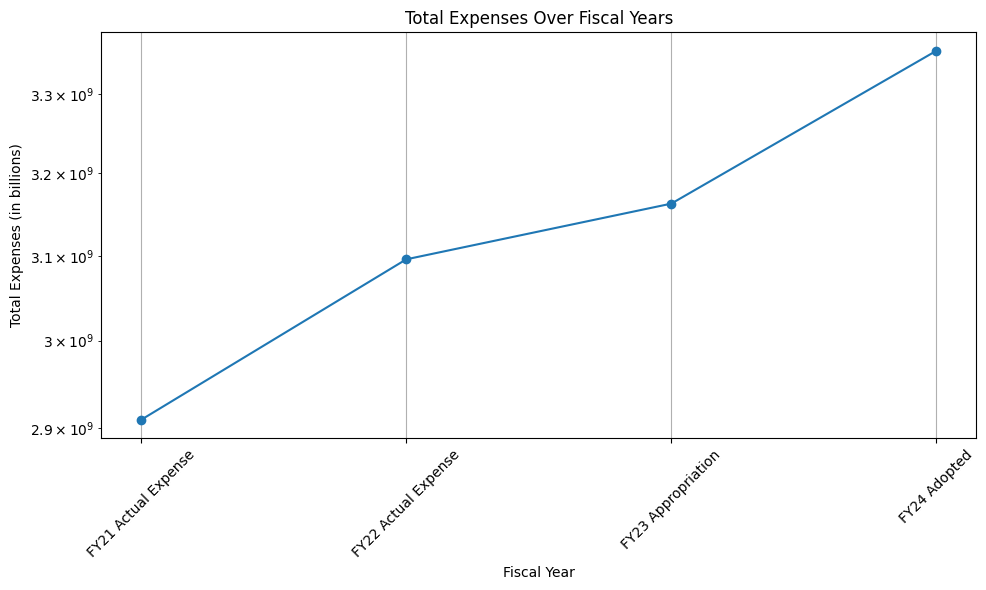

['Personnel Services' 'Contractual Services' 'Supplies & Materials'
 'Current Charges & Obligations' 'Equipment' 'Other Expenses'
 'Fixed Expenses']


In [10]:
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv('./data/fy24-adopted-operating-budget.csv')

# Convert the expense columns to numeric values, ignoring non-numeric data
expense_columns = ['FY21 Actual Expense', 'FY22 Actual Expense', 'FY23 Appropriation', 'FY24 Adopted']
data[expense_columns] = data[expense_columns].apply(pd.to_numeric, errors='coerce')

# Summing up the expenses for each fiscal year
yearly_expenses = data[expense_columns].sum()

# Plotting the total expenses over the years as a line graph
plt.figure(figsize=(10, 6))
yearly_expenses.plot(kind='line', marker='o')
plt.title('Total Expenses Over Fiscal Years')
plt.xlabel('Fiscal Year')
plt.ylabel('Total Expenses (in billions)')
plt.yscale('log')
plt.grid(True)
plt.xticks(range(len(expense_columns)), expense_columns, rotation=45)
plt.tight_layout()
plt.show()

print(data['Expense Category'].unique())


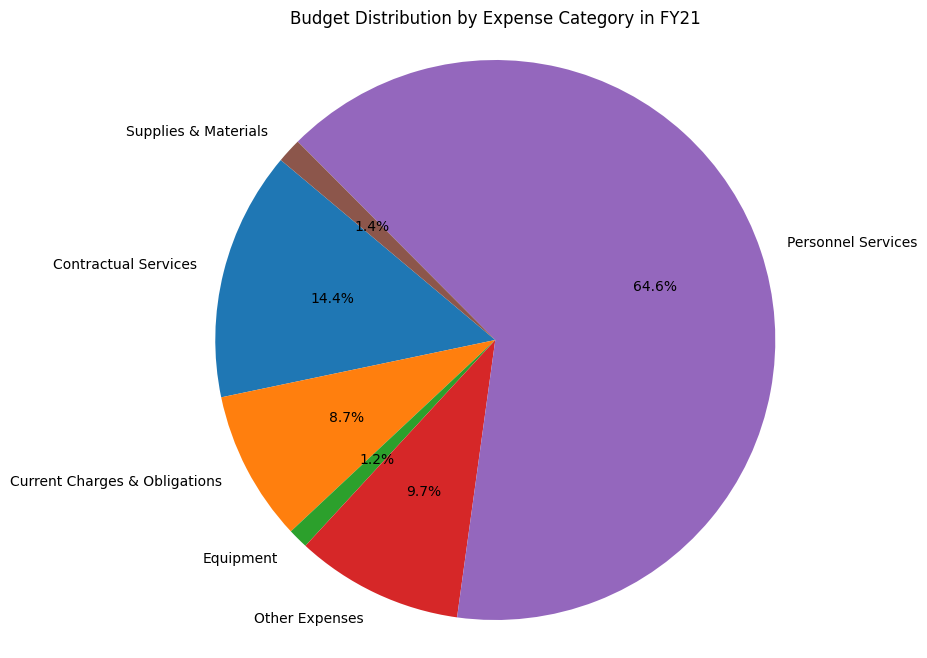

In [4]:
# Convert 'FY21 Actual Expense' to numeric, coercing errors to NaN
data['FY21 Actual Expense'] = pd.to_numeric(data['FY21 Actual Expense'], errors='coerce')

# Drop rows with NaN values in 'FY21 Actual Expense'
cleaned_budget_data = data.dropna(subset=['FY21 Actual Expense'])

# Aggregate the cleaned data by 'Expense Category'
expense_by_category = cleaned_budget_data.groupby('Expense Category')['FY21 Actual Expense'].sum()

# Plotting the pie chart
plt.figure(figsize=(10,8))
plt.pie(expense_by_category, labels=expense_by_category.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Budget Distribution by Expense Category in FY21')
plt.show()

/var/folders/pz/6c1wyh2n6wzbq635g5h9s4xw0000gn/T/ipykernel_3842/3424962997.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_budget_data['FY22 Actual Expense'] = pd.to_numeric(cleaned_budget_data['FY22 Actual Expense'], errors='coerce')
/var/folders/pz/6c1wyh2n6wzbq635g5h9s4xw0000gn/T/ipykernel_3842/3424962997.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_budget_data['FY23 Appropriation'] = pd.to_numeric(cleaned_budget_data['FY23 Appropriation'], errors='coerce')


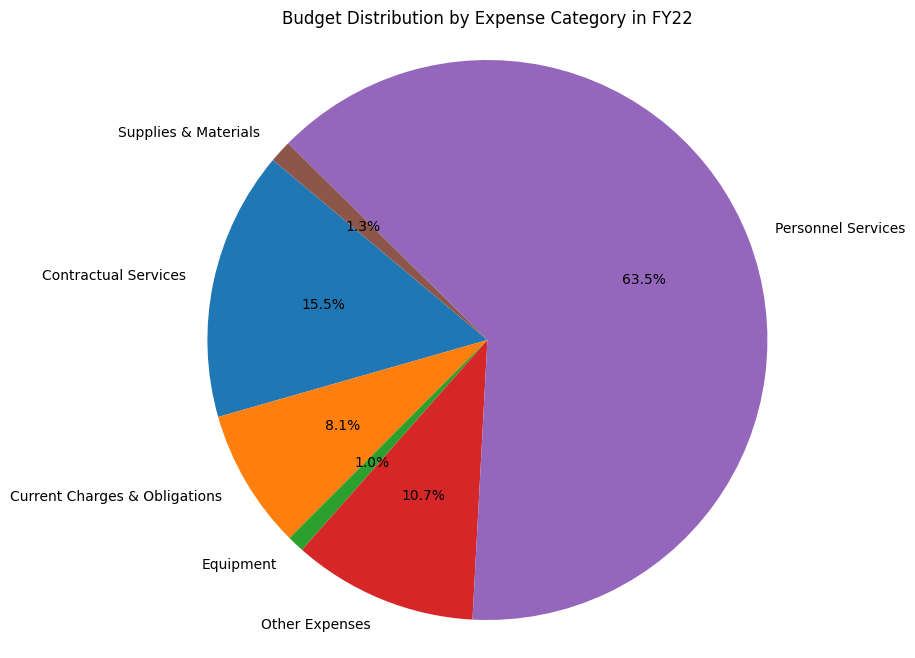

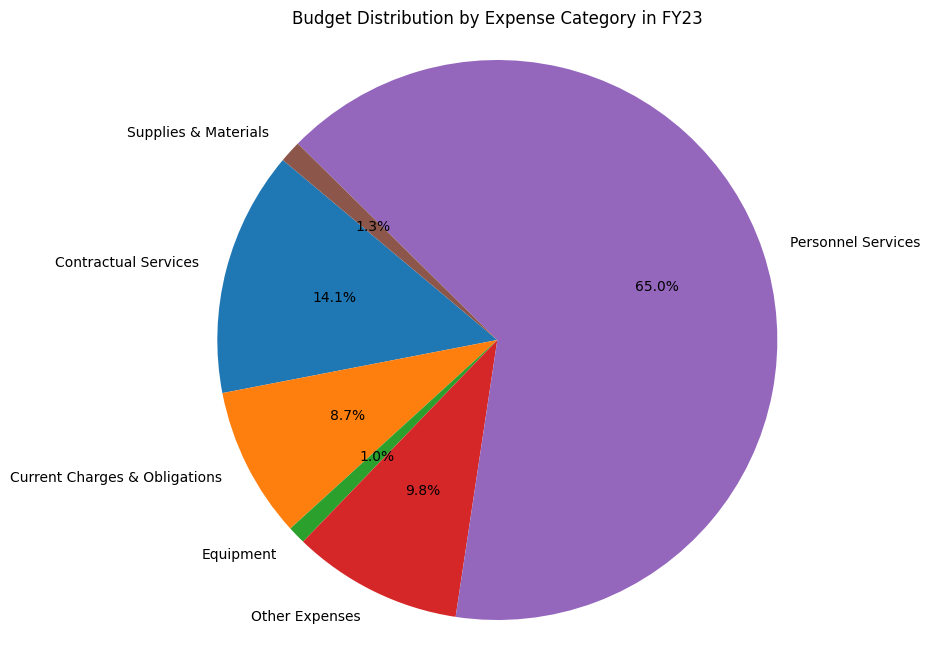

Total money spent in FY22: 3083461085.7590003
Total money spent in FY23: 3121653035.9272394


In [5]:
# Convert 'FY22 Actual Expense' and 'FY23 Appropriation' to numeric, coercing errors to NaN
cleaned_budget_data['FY22 Actual Expense'] = pd.to_numeric(cleaned_budget_data['FY22 Actual Expense'], errors='coerce')
cleaned_budget_data['FY23 Appropriation'] = pd.to_numeric(cleaned_budget_data['FY23 Appropriation'], errors='coerce')

# Drop rows with NaN values in 'FY22 Actual Expense' and 'FY23 Appropriation'
cleaned_budget_data = cleaned_budget_data.dropna(subset=['FY22 Actual Expense', 'FY23 Appropriation'])

# Aggregate the cleaned data by 'Expense Category' for FY22 and FY23
expense_by_category_22 = cleaned_budget_data.groupby('Expense Category')['FY22 Actual Expense'].sum()
expense_by_category_23 = cleaned_budget_data.groupby('Expense Category')['FY23 Appropriation'].sum()

# Calculate the total sum of money spent in FY22 and FY23
total_expense_22 = expense_by_category_22.sum()
total_expense_23 = expense_by_category_23.sum()

# Plotting the pie charts
plt.figure(figsize=(10,8))
plt.pie(expense_by_category_22, labels=expense_by_category_22.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Budget Distribution by Expense Category in FY22')
plt.show()

plt.figure(figsize=(10,8))
plt.pie(expense_by_category_23, labels=expense_by_category_23.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Budget Distribution by Expense Category in FY23')
plt.show()

# Output the total sum of money spent
print('Total money spent in FY22:', total_expense_22)
print('Total money spent in FY23:', total_expense_23)

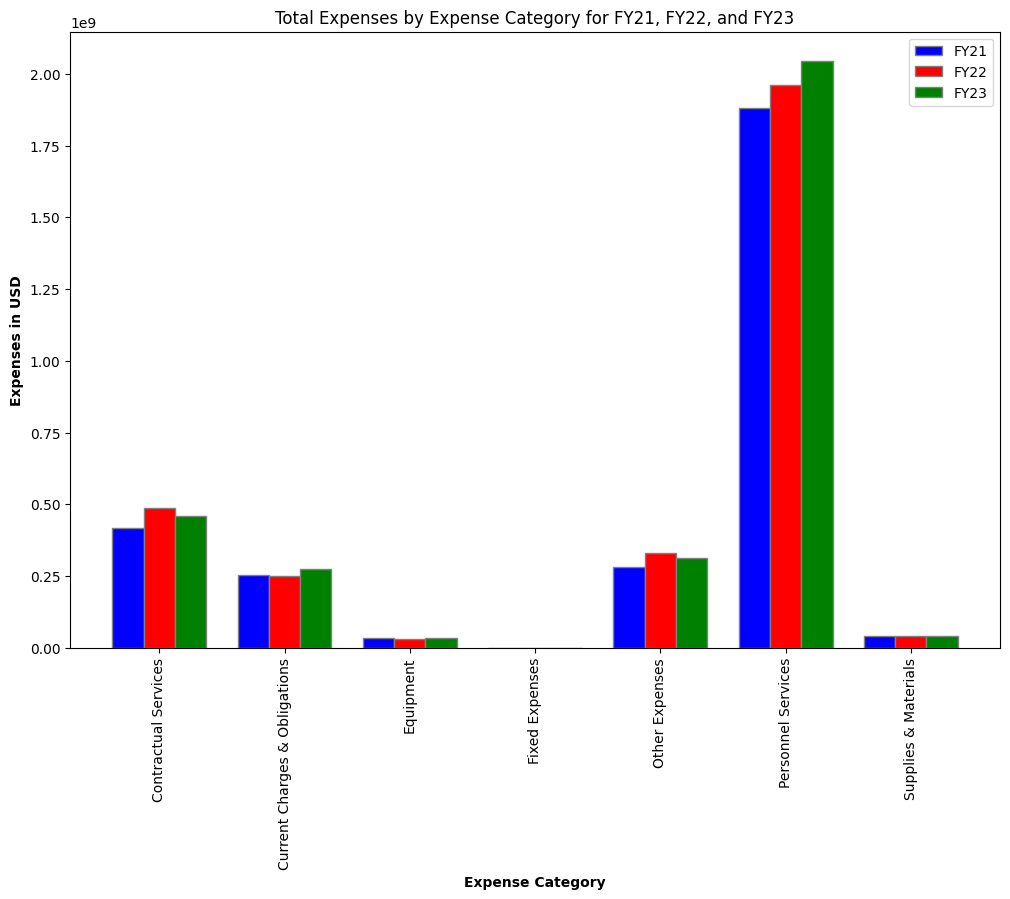

In [16]:
# Recreate the visualization with the corrected data
total_expenses_by_category = data.groupby('Expense Category')[['FY21 Actual Expense', 'FY22 Actual Expense', 'FY23 Appropriation']].sum().reset_index()

# Sort the categories for consistent plotting
sorted_total_expenses = total_expenses_by_category.sort_values(by='Expense Category')

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.25
# Set position of bar on X axis
r1 = np.arange(len(sorted_total_expenses['Expense Category']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Make the plot
ax.bar(r1, sorted_total_expenses['FY21 Actual Expense'], color='b', width=bar_width, edgecolor='grey', label='FY21')
ax.bar(r2, sorted_total_expenses['FY22 Actual Expense'], color='r', width=bar_width, edgecolor='grey', label='FY22')
ax.bar(r3, sorted_total_expenses['FY23 Appropriation'], color='g', width=bar_width, edgecolor='grey', label='FY23')

# Add xticks on the middle of the group bars
ax.set_xlabel('Expense Category', fontweight='bold')
ax.set_ylabel('Expenses in USD', fontweight='bold')
ax.set_xticks([r + bar_width for r in range(len(r1))])
ax.set_xticklabels(sorted_total_expenses['Expense Category'], rotation=90)
ax.set_title('Total Expenses by Expense Category for FY21, FY22, and FY23')

# Create legend & Show graphic
ax.legend()
plt.show()

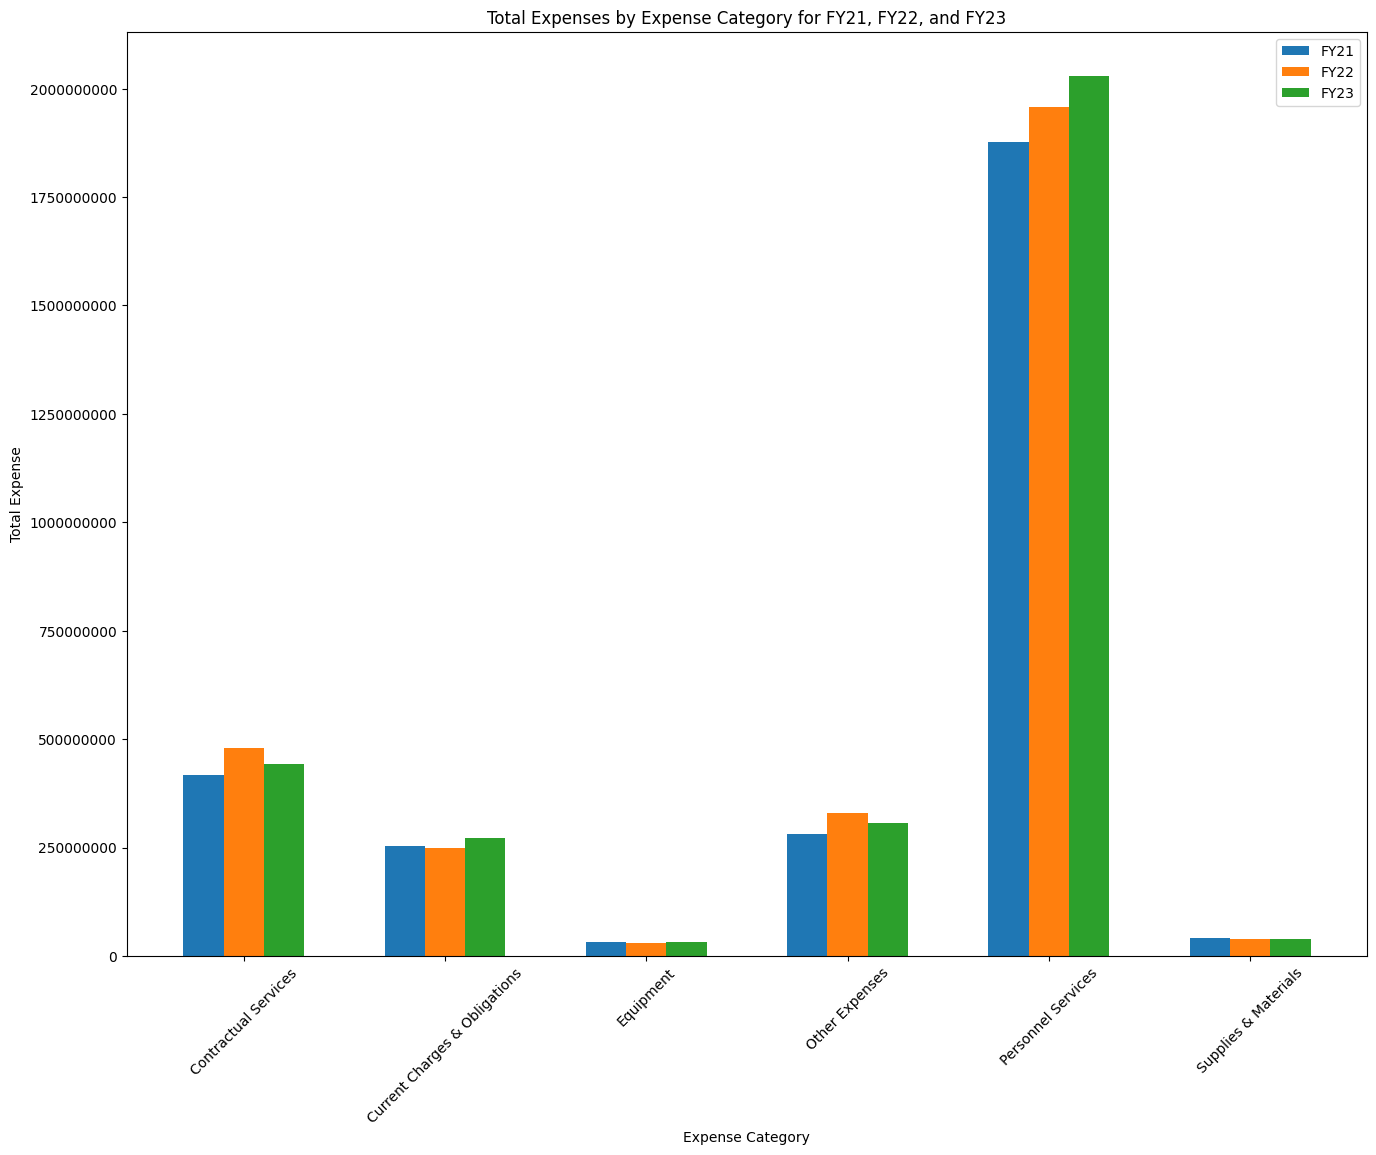

In [25]:
# Aggregate the data by 'Expense Category' for FY21, FY22, and FY23
expense_by_category_21 = cleaned_budget_data.groupby('Expense Category')['FY21 Actual Expense'].sum()
expense_by_category_22 = cleaned_budget_data.groupby('Expense Category')['FY22 Actual Expense'].sum()
expense_by_category_23 = cleaned_budget_data.groupby('Expense Category')['FY23 Appropriation'].sum()

# Create a stacked bar chart
expense_categories = expense_by_category_21.index
bar_width = 0.3
index = np.arange(len(expense_categories))

plt.figure(figsize=(16,12))
plt.bar(index, expense_by_category_21, bar_width, label='FY21')
plt.bar(index + bar_width, expense_by_category_22, bar_width, label='FY22')
plt.bar(index + 2*bar_width, expense_by_category_23, bar_width, label='FY23')
plt.xlabel('Expense Category')
plt.ylabel('Total Expense')
plt.title('Total Expenses by Expense Category for FY21, FY22, and FY23')
plt.xticks(index + bar_width, expense_categories, rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.show()

In [26]:
total_expenses_by_category = data.groupby('Expense Category')[['FY21 Actual Expense', 'FY22 Actual Expense', 'FY23 Appropriation']].sum().reset_index()
total_expenses_by_category

,Expense Category,FY21 Actual Expense,FY22 Actual Expense,FY23 Appropriation
0,Contractual Services,4.188497e+08,4.857800e+08,4.595378e+08
1,Current Charges & Obligations,2.529030e+08,2.492681e+08,2.733223e+08
2,Equipment,3.392875e+07,3.147047e+07,3.309682e+07
3,Fixed Expenses,0.000000e+00,0.000000e+00,0.000000e+00
4,Other Expenses,2.816448e+08,3.293750e+08,3.130339e+08
5,Personnel Services,1.881134e+09,1.960228e+09,2.044441e+09
6,Supplies & Materials,4.133135e+07,3.956315e+07,3.953274e+07


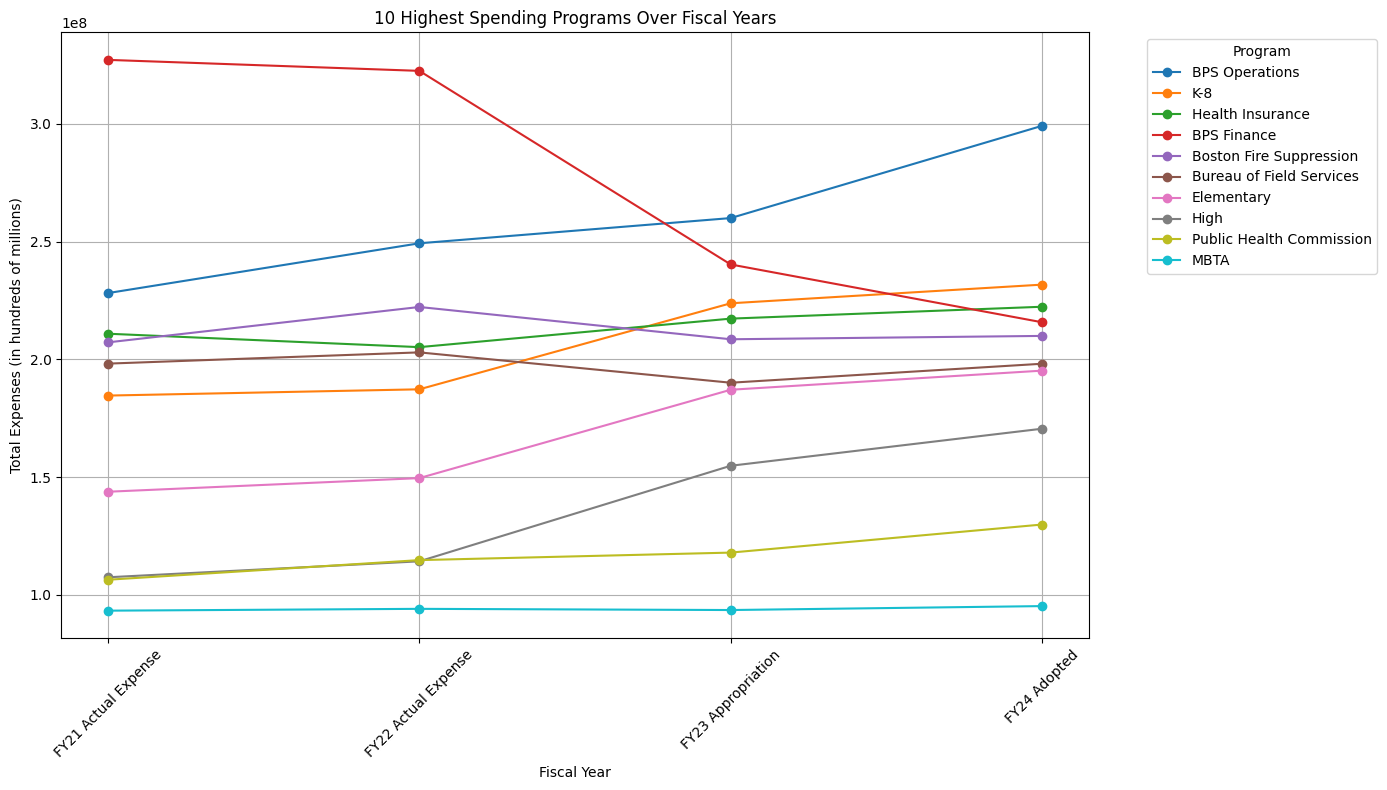

In [9]:
import matplotlib.pyplot as plt

# Convert the expense columns to numeric values, ignoring non-numeric data
expense_columns = ['FY21 Actual Expense', 'FY22 Actual Expense', 'FY23 Appropriation', 'FY24 Adopted']
data[expense_columns] = data[expense_columns].apply(pd.to_numeric, errors='coerce')

# Group the data by program and sum the expenses for each fiscal year
program_expenses = data.groupby('Program')[expense_columns].sum()

# Find the 10 highest spending programs for the latest fiscal year
highest_spending_programs = program_expenses.nlargest(10, expense_columns[-1])

# Plotting the spending for the 10 highest spending programs over the years
plt.figure(figsize=(14, 8))
for program in highest_spending_programs.index:
    plt.plot(expense_columns, highest_spending_programs.loc[program], marker='o', label=program)

plt.title('10 Highest Spending Programs Over Fiscal Years')
plt.xlabel('Fiscal Year')
plt.ylabel('Total Expenses (in hundreds of millions)')
plt.legend(title='Program', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
print(df.head())
df.info()
df.describe()

           Cabinet            Dept                 Program  \
0  Mayor's Cabinet  Mayor's Office  Mayor's Administration   
1  Mayor's Cabinet  Mayor's Office  Mayor's Administration   
2  Mayor's Cabinet  Mayor's Office  Mayor's Administration   
3  Mayor's Cabinet  Mayor's Office  Mayor's Administration   
4  Mayor's Cabinet  Mayor's Office  Mayor's Administration   

                Expense Category FY21 Actual Expense FY22 Actual Expense  \
0             Personnel Services          1820538.46          1624903.69   
1           Contractual Services           127557.82            284597.9   
2           Supplies & Materials            27318.17            28541.55   
3  Current Charges & Obligations            11365.77             19410.3   
4                      Equipment             39040.6            16164.36   

  FY23 Appropriation FY24 Adopted  
0        1584054.209   1921403.81  
1              99314    219633.42  
2              44938     55573.65  
3              29630     1

,Cabinet,Dept,Program,Expense Category,FY21 Actual Expense,FY22 Actual Expense,FY23 Appropriation,FY24 Adopted
count,900,900,900,900,900,900,900,900
unique,21,82,220,7,710,755,698,738
top,Finance Cabinet,Boston Public Schools,Film & Special Events,Personnel Services,#Missing,#Missing,#Missing,#Missing
freq,115,90,6,201,176,141,115,88


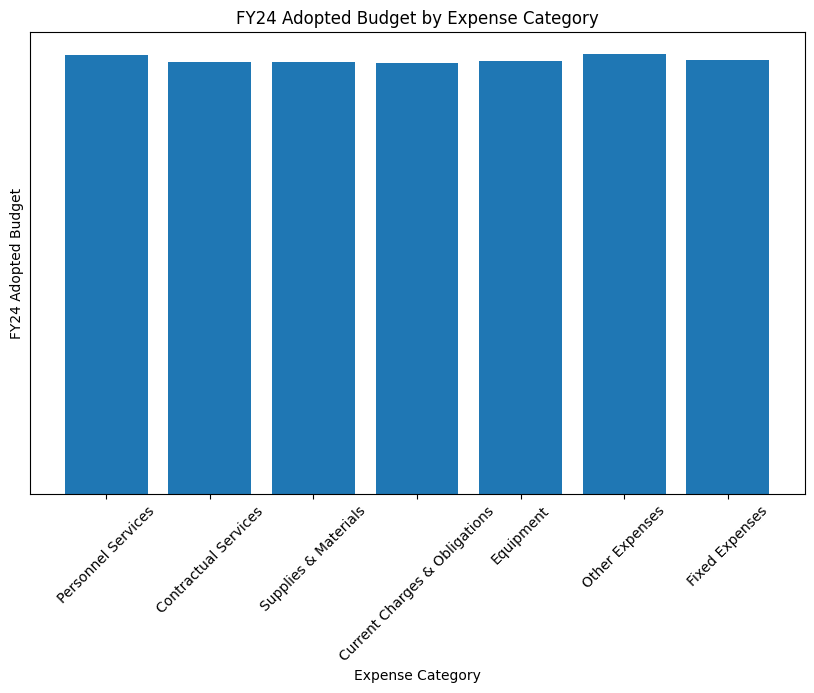

In [26]:
plt.figure(figsize=(10, 6))
plt.bar(df['Expense Category'], df['FY24 Adopted'])
plt.xlabel('Expense Category')
plt.ylabel('FY24 Adopted Budget')
plt.title('FY24 Adopted Budget by Expense Category')
plt.xticks(rotation=45)
plt.yticks([])
plt.show()
# Budget in dollars allocation for each category

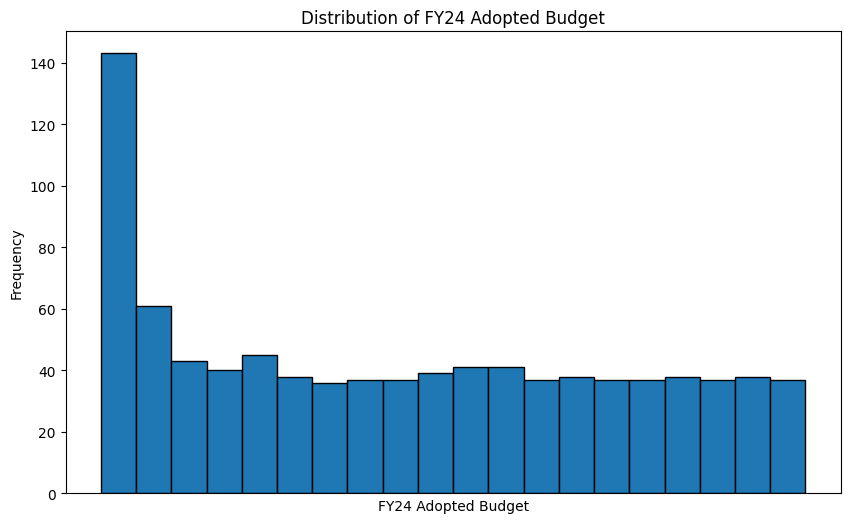

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(df['FY24 Adopted'], bins=20, edgecolor='k')
plt.xlabel('FY24 Adopted Budget')
plt.ylabel('Frequency')
plt.xticks([])
plt.title('Distribution of FY24 Adopted Budget')
plt.show()
# How many times each category occurs (x axis removed for readibility but can be added back)


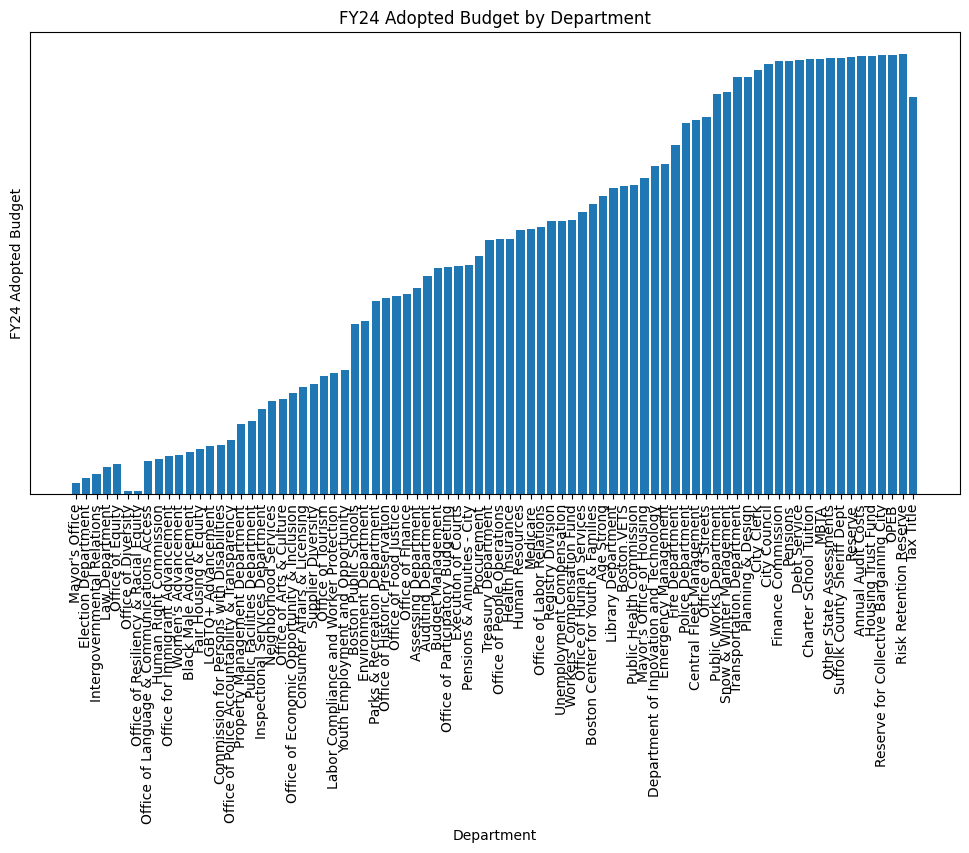

In [40]:
plt.figure(figsize=(12, 6))
plt.bar(df['Dept'], df['FY24 Adopted'])
plt.xlabel('Department')
plt.ylabel('FY24 Adopted Budget')
plt.title('FY24 Adopted Budget by Department')
plt.xticks(rotation=90)
plt.yticks([])
plt.show()


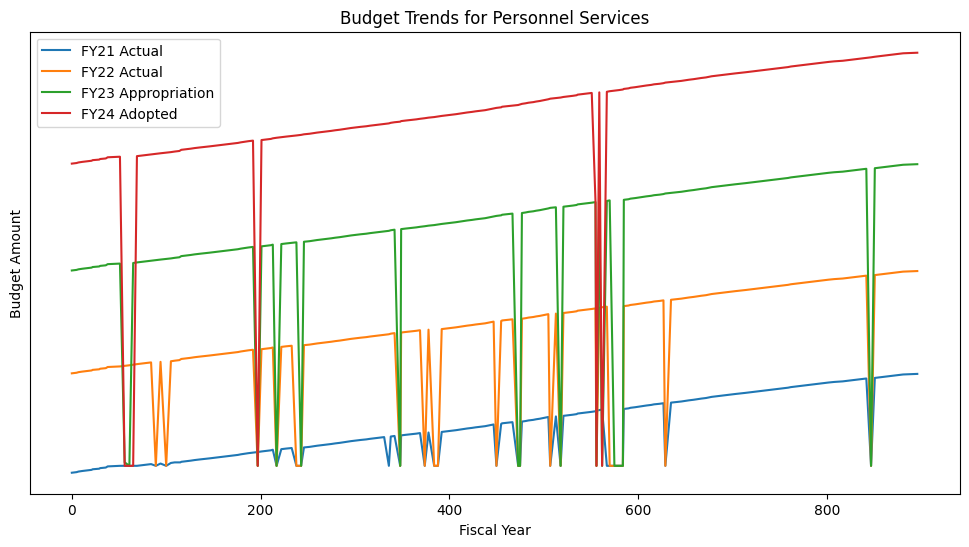

In [46]:
# Choose an Expense Category or Department
selected_category = 'Personnel Services'
selected_data = df[df['Expense Category'] == selected_category]

plt.figure(figsize=(12, 6))
plt.plot(selected_data['FY21 Actual Expense'], label='FY21 Actual')
plt.plot(selected_data['FY22 Actual Expense'], label='FY22 Actual')
plt.plot(selected_data['FY23 Appropriation'], label='FY23 Appropriation')
plt.plot(selected_data['FY24 Adopted'], label='FY24 Adopted')
plt.xlabel('Fiscal Year')
plt.ylabel('Budget Amount')
plt.title(f'Budget Trends for {selected_category}')
plt.legend()
plt.yticks([])
plt.show()


In [47]:
import seaborn as sns

census_data = pd.read_csv('./data/census.csv', skiprows=1)
census_data = census_data.sort_values('Total:', ascending=True)
census_data.head()

,field concept,Total:,White alone,Black or African American alone,Hispanic or Latino,"Asian, Native Hawaiian and Pacific Islander alone, all ages","Other Races or Multiple Races, all ages",Total:.1,White alone.1,Black or African American alone.1,...,Nursing facilities/Skilled-nursing facilities,Other institutional facilities,Noninstitutionalized population:,College/University student housing,Military quarters,Other noninstitutional facilities,Total:.3,Occupied,Vacant,household size
12,Longwood,5186,3584,329,486,612,175,5142,3581,316,...,0,0,4624,4624,0,0,366,317,49,1.772871
19,South Boston Waterfront,5579,4315,160,316,482,306,5286,4171,138,...,0,0,1,0,0,1,4622,3624,998,1.539183
5,Chinatown,6211,1844,254,451,3480,182,5477,1741,216,...,0,0,446,443,0,3,3272,2937,335,1.962887
21,West End,7705,4933,338,613,1440,381,7098,4620,303,...,0,57,53,0,0,53,5243,4572,671,1.653762
2,Beacon Hill,9336,7521,252,537,630,396,8603,6980,231,...,0,0,33,0,0,33,6037,5485,552,1.696080


100%|██████████| 23/23 [00:00<00:00, 59918.63it/s]


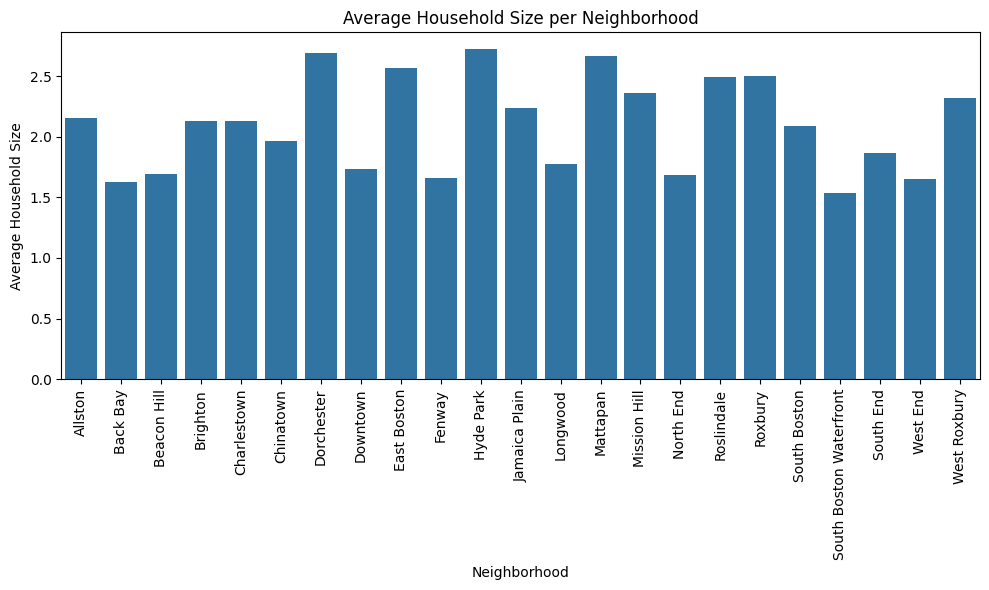

In [43]:
# Visualize the average household size per neighborhood
plt.figure(figsize=(10, 6))
sns.barplot(x=census_data['field concept'], y=census_data['household size'].progress_apply(pd.to_numeric, errors='coerce'))
plt.xticks(rotation=90)
plt.title('Average Household Size per Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Household Size')
plt.tight_layout()
plt.show()

100%|██████████| 23/23 [00:00<00:00, 54502.26it/s]


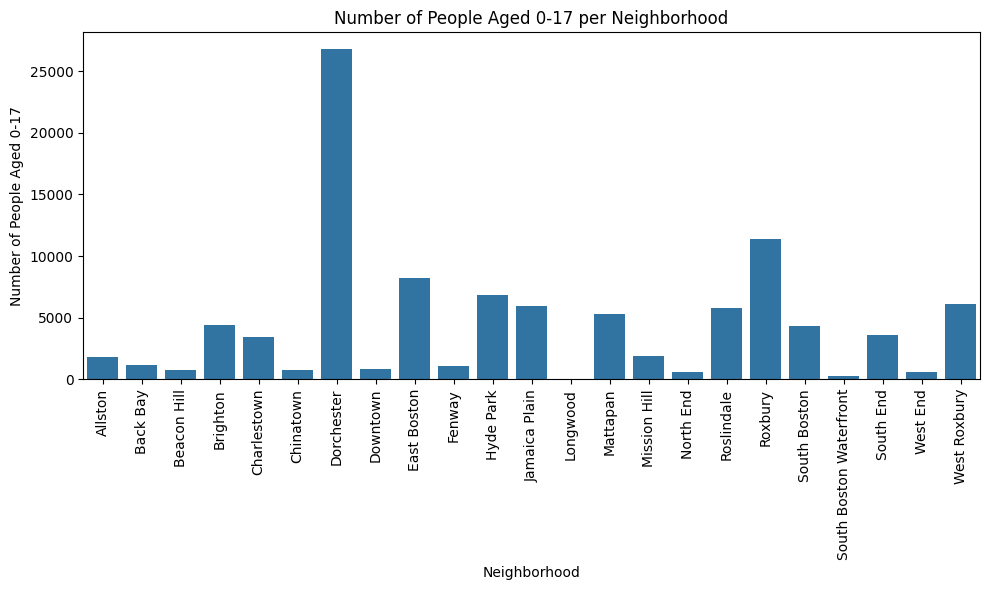

In [44]:
# Visualize the number of people aged 0-17 per neighborhood
plt.figure(figsize=(10, 6))
sns.barplot(x=census_data['field concept'], y=census_data['Total: aged 0-17'].progress_apply(pd.to_numeric, errors='coerce'))
plt.xticks(rotation=90)
plt.title('Number of People Aged 0-17 per Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Number of People Aged 0-17')
plt.tight_layout()
plt.show()

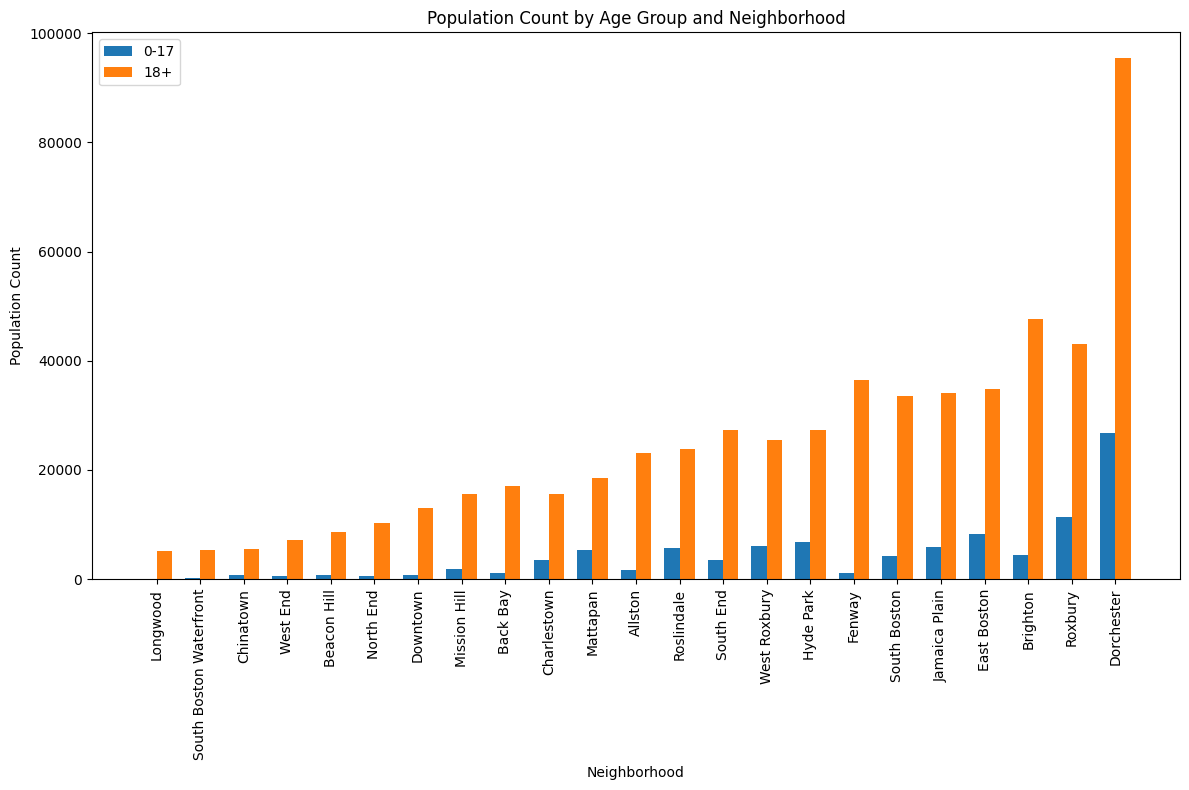

In [48]:
# Visualize the number of people aged 0-17 and 18+ per neighborhood
import numpy as np

# Convert the columns to numeric to handle any errors
census_data['Total: aged 0-17'] = pd.to_numeric(census_data['Total: aged 0-17'], errors='coerce')
# census_data['Total: aged 18+'] = pd.to_numeric(census_data['Total:.1'], errors='coerce') - census_data['Total: aged 0-17']
census_data['Total: aged 18+'] = census_data['Total:'] - census_data['Total: aged 0-17']

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.35
index = np.arange(len(census_data))

bar1 = ax.bar(index, census_data['Total: aged 0-17'], bar_width, label='0-17')
bar2 = ax.bar(index + bar_width, census_data['Total: aged 18+'], bar_width, label='18+')

ax.set_xlabel('Neighborhood')
ax.set_ylabel('Population Count')
ax.set_title('Population Count by Age Group and Neighborhood')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(census_data['field concept'], rotation=90)
ax.legend()

plt.tight_layout()
plt.show()

100%|██████████| 11/11 [00:00<00:00, 38608.66it/s]


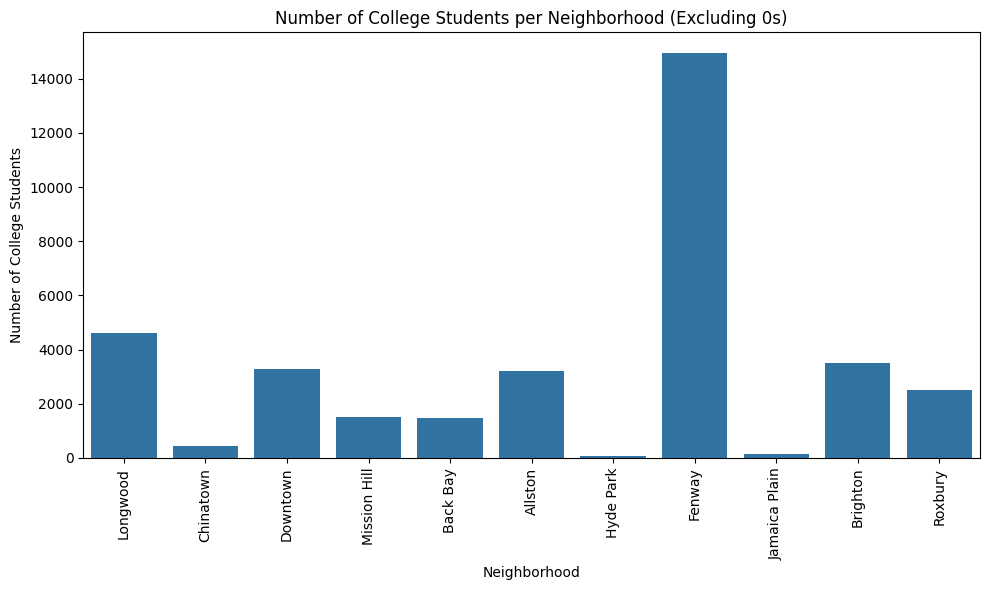

In [52]:
# Visualize the number of college students per neighborhood, excluding cells with a value of 0
plt.figure(figsize=(10, 6))
filtered_data = census_data[census_data['College/University student housing'].astype(int) > 0]
sns.barplot(x=filtered_data['field concept'], y=filtered_data['College/University student housing'].progress_apply(pd.to_numeric, errors='coerce'))
plt.xticks(rotation=90)
plt.title('Number of College Students per Neighborhood (Excluding 0s)')
plt.xlabel('Neighborhood')
plt.ylabel('Number of College Students')
plt.tight_layout()
plt.show()